<a href="https://colab.research.google.com/github/wlail-iu/D590-NLP-F24/blob/main/WLail_Week_2_Coding_Practice_Copy_of_Text_Pre_Processing_Operations_using_spaCy_scrivner_tokenization_Fall24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tokenization Using spaCy

- D-590 Fall 2024

Adapted from "A QUICK GUIDE TO TOKENIZATION, LEMMATIZATION, STOP WORDS, AND PHRASE MATCHING USING SPACY" Tripathu (20220)

Reference and for more details, refer [spaCy documentation](https://spacy.io/)

Tokenization is the first step in text processing task. Tokenization is not only breaking the text into components, pieces like words, punctuation etc known as tokens. However it is more than that. spaCy do the intelligent tokenizer which internally identify whether a "." is a punctuation and separate it into token or it is part of abbreviation like "U.S." and do not separate it.

**spaCy** applies rules specific to the Language type. Let's understand with an example.

In [1]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [2]:
doc = nlp("\"Next Week, We’re coming from U.S.!\"")
for token in doc:
    print(token.text)

"
Next
Week
,
We
’re
coming
from
U.S.
!
"


* **spaCy** splits words based on the whitespace by default.
* Then it processes the text from left to right and on each item (splittted based on whiespace) it performs the following two checks:
    * **Exception Rule Check:** Punctuation available in "U.S." should not be treated as further tokens. It should remian one. However we're should be splitted into "we" and " 're "
    * **Prefix, Suffix and Infix check:** Punctuation like commas, periods, hyphens or quotes to be treated as tokens and separated out.

<img src='https://ashutoshtripathicom.files.wordpress.com/2020/04/tokenization.png'/>

Tokens are the basic building blocks of a Doc object - everything that helps us understand the meaning of the text is derived from tokens and their relationship to one another.

## Prefixes, Suffixes and Infixes as Tokens

* spaCy will separate punctuation that does *not* form an integral part of a word
* Quotation marks, commas, and punctuation at the end of a sentence will be assigned their own token
* Punctuation that exists as part of an email address, website or numerical value will be kept as part of the token

In [3]:
doc2 = nlp("We're here to guide you! Send your query, \
email contact@enetwork.ai or visit us at http://www.enetwork.ai!")

for t in doc2:
    print(t)

We
're
here
to
guide
you
!
Send
your
query
,
email
contact@enetwork.ai
or
visit
us
at
http://www.enetwork.ai
!


**Note** that the exclamation points, comma are assigned their own tokens. However point, colon present in email address and website url are not isolated. Hence both the email address and website are preserved.

In [4]:
doc3 = nlp('A 40km U.S. cab ride costs $100.60')
for t in doc3:
    print(t)

A
40
km
U.S.
cab
ride
costs
$
100.60


Here the distance unit and dollar sign are assigned their own tokens, however the dollar amount is preserved, point in amount is not isolated.

## Exceptions in Token generation

Punctuation that exists as part of a known abbreviation will be kept as part of the token.

In [5]:
doc4 = nlp("Let's visit the St. Louis in the U.S. next year.")
for t in doc4:
    print(t)

Let
's
visit
the
St.
Louis
in
the
U.S.
next
year
.


Here the abbreviations for "Saint" and "United States" are both preserved. Mean point next to St. is not separated as token. Same in U.S.

## Counting Tokens

using len() function, you can count the number of tokens in a document.

In [6]:
len(doc4)

12

## Indexing and Slicing in Token

* `Doc` object is a list of `token` objects
* Individual tokens can be retrieved by index position
* Spans of tokens can be retrieved through slicing

In [7]:
doc5 = nlp('Mock Interviews are of great help in cracking real interviews. However, they are always ingonred')

# Retrieve the third token:
doc5[2]

are

In [8]:
# Retrieve three tokens from the middle:
doc5[2:5]

are of great

In [9]:
# Retrieve the last four tokens:
doc5[-4:]

they are always ingonred

# Lemmatization

* Lemmatization is the process of reducing the words to their base form or lemmas
* Example: the lemma of 'was' is 'be', lemma of “rats” is “rat”

In [10]:
doc = nlp('I travelled to Japan in the last 5 years.')
for token in doc:
    print(token.text, token.lemma_)

I I
travelled travel
to to
Japan Japan
in in
the the
last last
5 5
years year
. .


# Stop Words

* Words like "a" and "the" appear so frequently that they don't require tagging as thoroughly as nouns, verbs and modifiers.
* We call them *stop words*, and they can be filtered from the text to be processed.
* **spaCy holds a built-in list of some 305 English stop words**.

In [11]:
# Print the set of spaCy's default stop words (remember that sets are unordered):
print(nlp.Defaults.stop_words)

{'her', 'myself', '’ll', 'another', 'around', 'has', 'per', 'wherein', 'make', 'go', 'hence', 'ca', 'thence', 'namely', 'further', 'most', 'seem', 'ours', 'when', 'because', "'m", '‘m', 'ten', 'until', 'herein', 'the', "n't", 'back', 'our', 'except', 'much', '’re', 'seemed', 'its', 'within', 'doing', 'whose', 'as', 'twelve', '‘s', 'can', 'whoever', 'neither', 'nine', 'once', 'mine', 'besides', 'also', 'others', 'could', 'elsewhere', 'made', 'yourselves', 'did', 'down', 'front', 'mostly', 'two', 'he', 're', 'everyone', 'really', 'while', 'whether', 'whom', 'should', 'forty', 'however', 'twenty', 'this', 'them', '‘re', 'during', 'thereby', 'through', 'or', 'was', 'various', 'becomes', 'have', 'quite', 'formerly', 'how', 'than', 'any', 'those', 'since', 'somehow', 'are', 'some', 'does', 'too', 'been', 'which', 'even', 'one', 'name', 'without', 'do', 'rather', 'although', 'beforehand', 'under', 'behind', 'a', 'hereby', 'beside', 'out', 'last', 'it', 'themselves', 'never', 'there', 'nothing

#### You can print the total number of stop words using the `len()` function

In [12]:
len(nlp.Defaults.stop_words)

326

### Check if a word is a stop word

In [13]:
nlp.vocab['fifteen'].is_stop

True

In [14]:
nlp.vocab['August'].is_stop

False

## Adding a user defined stop word

There may be times when you wish to add a stop word to the default set.
Perhaps you decide that `'btw'` (common shorthand for "by the way") should be considered a stop word.

In [15]:
# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('btw') #alwasy use lowercase while adding the stop words

# Set the stop_word tag on the lexeme
nlp.vocab['btw'].is_stop = True

In [16]:
len(nlp.Defaults.stop_words)

327

In [17]:
nlp.vocab['btw'].is_stop

True

## Removing a stop word

Alternatively, you may decide that `'without'` should not be considered a stop word.

In [18]:
# Remove the word from the set of stop words
nlp.Defaults.stop_words.remove('with')

# Remove the stop_word tag from the lexeme
nlp.vocab['without'].is_stop = False

In [19]:
len(nlp.Defaults.stop_words)

326

In [20]:
nlp.vocab['with'].is_stop

False

# Stemming

- Stemming refers to reducing a word to its root form
- spacY does not provide tools for stemming
- NLTK librar has many options for stemming

Example:
-> "likes"
-> "liked"
-> "likely"
-> "liking

The stem is **like**

Stemming is useful in many tasks, such as search engines and domain analysis

In [21]:
import nltk

PorterStemmer is a widely used stemmer.

In [22]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [23]:
ps = PorterStemmer()

# choose some words to be stemmed
words = ["program", "programs", "programmer", "programming", "programmers"]

for w in words:
    print(w, " : ", ps.stem(w))

program  :  program
programs  :  program
programmer  :  programm
programming  :  program
programmers  :  programm


## Built-In Word tokenizer in NLTK

You need to download a punkt (=punctuation) module (for tokenization)

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
sentence = "Programmers program with programming languages"
words = word_tokenize(sentence)

for w in words:
    print(w, " : ", ps.stem(w))

Programmers  :  programm
program  :  program
with  :  with
programming  :  program
languages  :  languag


Note: punctiation is excluded.

### Joining stemmed tokens together using reduce module

- Reduce applies a given function to the elements of a sequence in a cumulative way

In [27]:
from functools import reduce

In [28]:
# using reduce to apply stemmer to each word and join them back into a string
stemmed_sentence = reduce(lambda x, y: x + " " + ps.stem(y), words, "")

print(stemmed_sentence)

 programm program with program languag


- lambda function takes two arguments x and y (x represents the cumulative result = the stemmed sentence so far), and y represents the current word being processed
- The lambda function concatenates the current stemmed word ps.stem(y) with the cumulative result x and a space " "
- "" - initial value of the stemmed sentence (=empty string)

# Tagging

- It categorizes the tokens as nouns, verbs, adjectives...

<image src='https://machinelearningknowledge.ai/wp-content/uploads/2021/06/Untitled.png'/>

source: https://machinelearningknowledge.ai/tutorial-on-spacy-part-of-speech-pos-tagging/

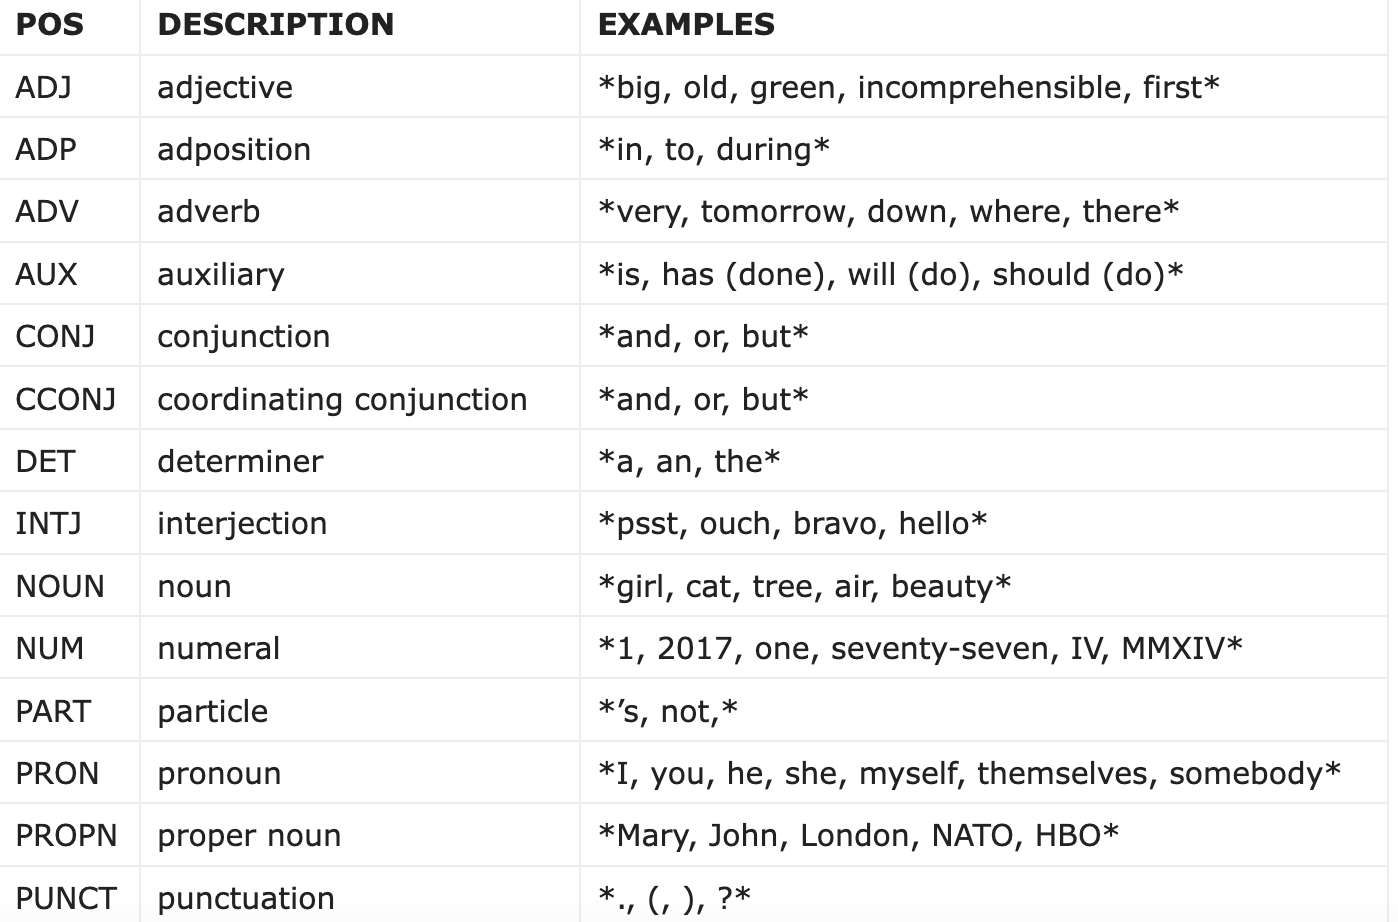

In [29]:
doc = nlp("Get busy living or get busy dying.")

# Using a formatted string (f) to add the width (how many characters) for each item
print(f"{'text':{8}} {'POS':{6}}  {'POS explained':{20}} ")
for token in doc:
    print(f'{token.text:{8}} {token.pos_:{6}}  {spacy.explain(token.pos_):{20}}')

text     POS     POS explained        
Get      VERB    verb                
busy     ADJ     adjective           
living   VERB    verb                
or       CCONJ   coordinating conjunction
get      VERB    verb                
busy     ADJ     adjective           
dying    VERB    verb                
.        PUNCT   punctuation         


You should be familiar now with the use of
- .text
- .pos_
- .lemma_
- .vocab

# Dependency

- It assigns syntactic functions to ecah word in a sentence

In [30]:
from spacy import displacy

In [31]:
doc = nlp("You only live once, but if you do it right, once is enough.")
for token in doc:
    print(f'{token.text:{8}}, {token.dep_:{6}}')

You     , nsubj 
only    , advmod
live    , ROOT  
once    , advmod
,       , punct 
but     , cc    
if      , mark  
you     , nsubj 
do      , advcl 
it      , dobj  
right   , advmod
,       , punct 
once    , advmod
is      , conj  
enough  , acomp 
.       , punct 


In [32]:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

## Visualizers in spaCY

- Read https://spacy.io/usage/visualizers